
#





In [1]:
## Settings
options(warn = -1) ## 경고 지우기
options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정

## Libraries
library(stringr) # stringr 불러오기
library(dplyr) # dplyr 불러오기
library(plotrix) # 3D pie
library(RColorBrewer) # color package
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
#library(extrafont)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

다음의 패키지를 부착합니다: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [17]:
mr <-read.csv("../Data/mushroom.csv" , header =F, stringsAsFactors = T)
head(mr)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
6,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


# Muchroom 
- 8124 종류의 버섯의 특징과 독의 유무를 정리해논 데이터셋
- 버섯 모양의 특징을 기반으로 독의 유무를 판단
- 한줄 (row) 이 버섯 한종류 
  - 1번째 컬럼은 독의 유무 : 독(p) , 식용 (e)
  - 2 번째 컬럼은 버섯의 머리 모양 : b (bell 형태 ) , c( 원뿔), x (볼록) , f(평평),  k(혹), (s)오목 
  - 4 번째 컬럼은 버섯의 머리 색 : n(갈색), b(황갈색), c(연한갈색), g(회색)


In [18]:
# 랜덤포레스트를 이용한 버섯 분류 예측
tail(mr)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
8119,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8120,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8121,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8122,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8123,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8124,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [19]:
str(mr)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

In [20]:
# target Data를 factor 로 변환
mr$V1 <- as.factor(mr$V1)
str(mr)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

In [22]:
#feature 를 숫자화
#mr$V2 <-as.numeric(mr$V2)
for ( i in 2:23){
    mr[,i] = as.numeric(mr[,i]) # v1 은 타겟 
}
head(mr)
#샘플링 하려고 정렬을 하는것이다. 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,p,6,3,5,2,7,2,1,2,5,...,3,8,8,1,3,2,5,3,4,6
2,e,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
3,e,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
4,p,6,4,9,2,7,2,1,2,6,...,3,8,8,1,3,2,5,3,4,6
5,e,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2
6,e,6,4,10,2,1,2,1,1,6,...,3,8,8,1,3,2,5,3,3,2


In [24]:
#V1 기준으로 p 와 e를 정렬
mr<- arrange( mr, V1)
head(mr)
tail(mr)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,e,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
2,e,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
3,e,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2
4,e,6,4,10,2,1,2,1,1,6,...,3,8,8,1,3,2,5,3,3,2
5,e,1,3,9,2,1,2,1,1,3,...,3,8,8,1,3,2,5,3,3,4
6,e,1,4,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,4,4


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8119,p,4,4,3,1,9,2,1,2,1,...,2,7,7,1,3,2,1,8,5,1
8120,p,3,4,2,1,5,1,1,1,12,...,4,2,2,1,3,1,4,8,2,1
8121,p,4,4,5,1,8,2,1,2,1,...,2,7,8,1,3,2,1,8,5,3
8122,p,4,3,3,1,9,2,1,2,1,...,3,7,8,1,3,2,1,8,5,1
8123,p,4,4,5,1,3,2,1,2,1,...,3,7,8,1,3,2,1,8,5,1
8124,p,4,4,5,1,9,2,1,2,1,...,2,8,8,1,3,2,1,8,5,3


In [25]:
# 독버섯인지 아닌지 예측 하려함. -> 타겟의 분포가 비슷한지 확인해야함. max 가 6:4 임 7:3 이면 예측하면 안됨

# 정리한 e 와 p 의 갯수 확인
install.packages("descr")


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmpsDwVDU/downloaded_packages


In [26]:
library(descr)

,Frequency,Percent
e,4208,51.79714
p,3916,48.20286
Total,8124,100.00000


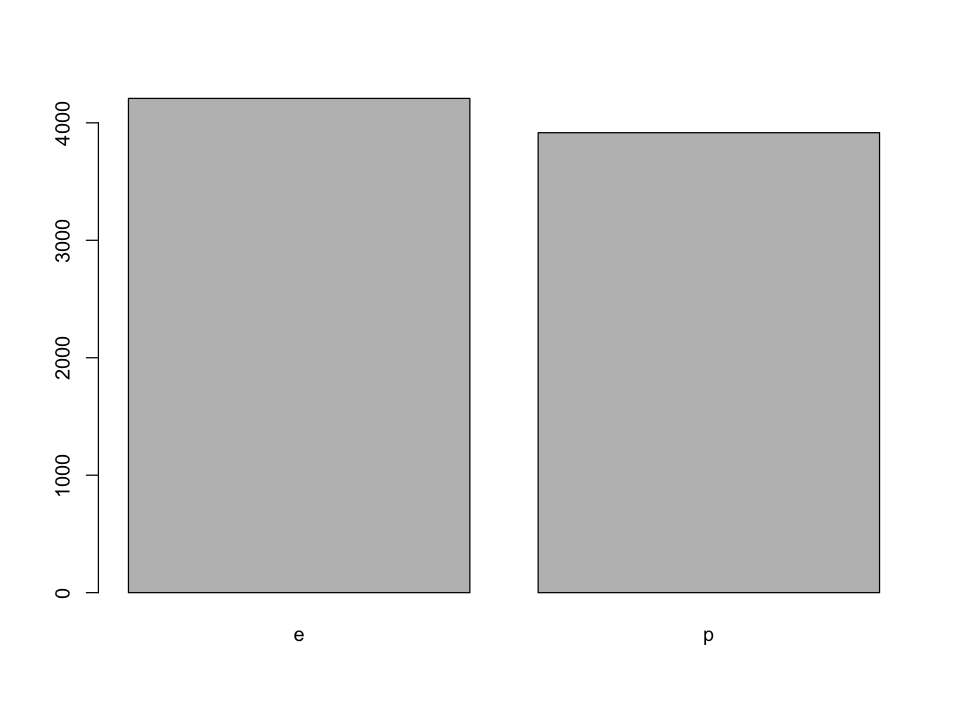

In [30]:
par(bg ='white')
freq(mr$V1)

In [34]:
# 식용버섯의 갯수
e<-nrow(subset(mr,V1 =="e"));e
# 독버섯의 갯수 
p<-nrow(subset(mr,V1 =="p"));p
# 비율 
e/p

[1] 4208

[1] 3916

[1] 1.074566

In [63]:
# Sampling
library(caret)
set.seed(1234)
samp <- createDataPartition(mr$V1, p=0.7 , list =F)








In [41]:
data.train <- mr[samp,]
data.test <- mr[-samp,]

In [85]:
# 랜덤포레스트 예측 함수
rfFun <- function(data,target_col,rf_n,iter_n){
    library(caret)
    library(randomForest)
    target <- data[,target_col] # target 칼럼
    acc <-c()
    cat("예측률 \n")
    for(i in 1:iter_n){
        samp <- createDataPartition(data[,target_col], p =0.7, list =F)
        # 학습용, 검증용 분류
        data.tr     <- data[samp,]
        data.test   <- data[-samp,]
        # 문제 및 정답 만들기 
        x <- subset(data.test, select = -target_col)
        y <- data.test[,target_col]
        # 모델 생성
        target_name<-colnames(data)[target_col] 
        rf <- randomForest(data.tr$V1 ~ ., data =data.tr, ntree =rf_n)
        # 예측
        pred<-predict(rf,x )
        acc<-append(acc,mean(pred==y))
        cat(mean(pred==y)," ")
    }
    cat("\n\033[36m Random Forrest 평균 예측률 : ",mean(acc) ,"\033[0m",sep = "")
    #return(mean(acc))
}
rfFun(mr,1,2,10)





예측률 
0.9995895  0.999179  0.9979475  0.9987685  0.9885057  1  0.998358  0.9917898  0.9954844  0.9856322  
 Random Forrest 평균 예측률 : 0.9955255

In [86]:
# Random Forest 로 예측력 확인하기
# 인공신경망을 이용한 예측력 확인하기
# SVM 이용한 예측력확인하기
# 로지스틱 회귀분석을 이용한 예측 력확인하기 

In [134]:
# 인공신경망 예측 함수
nnFun <- function(data,target_col,rf_n,iter_n){
    library(caret)
    library(randomForest)
    library(nnet)
    target <- data[,target_col] # target 칼럼
    acc_rf <-c()
    acc_nn <-c()
    cat("예측률 \n")

    for(i in 1:iter_n){
        samp <- createDataPartition(data[,target_col], p =0.7, list =F)
        # 학습용, 검증용 분류
        data.tr     <- data[samp,]
        data.test   <- data[-samp,]
        # 문제 및 정답 만들기 
        x <- subset(data.test, select = -target_col)
        y <- data.test[,target_col]
        # 모델 생성
        target_name<-colnames(data)[target_col] 
        Training_target<-data.frame(V1=data.tr[,target_col])
        model.nnet <- nnet(Training_target$V1 ~ ., data =data.tr, size = 3, trace =F) 

        rf <- randomForest(Training_target$V1 ~ ., data =data.tr, ntree =rf_n)
        # 예측
        pred_rf <-predict(rf,x )
        pred_nn <-predict(model.nnet,x )
        acc_rf<-append(acc_rf,mean(pred_rf == y))
        acc_nn<-append(acc_nn,mean(pred_nn == y))
        cat(mean(pred_rf ==y)," ")
    }
    cat("\n\033[36m Random Forrest 평균 예1측률 : ",mean(acc_rf) ,"\033[0m",sep = "")
    cat("\n\033[36m Neural Network 평균 예측률 : ",mean(acc_nn) ,"\033[0m",sep = "")
    #return(mean(acc))
}

# data,target_col,rf_n,iter_n
nnFun(mr,1,2,5)
nnFun(mr4,1,2,5)





예측률 
0.9844007  0.9987685  0.9971264  0.9971264  0.9987685  
 Random Forrest 평균 예1측률 : 0.9952381
 Neural Network 평균 예측률 : 0예측률 
0.9958949  0.9967159  0.9979475  0.9917898  0.999179  
 Random Forrest 평균 예1측률 : 0.9963054
 Neural Network 평균 예측률 : 0

---
# One Hot Encoding
- Feature Engineering의 한분야 ( 컬럼 재생산)
- 칼럼이 틀리면 예측값이 달라진다. 

In [105]:
# 각 컬럼별 Data 확인
# str(mr)
for ( i in 2:23){
    cat("Column Name: ", colnames(mr[,i]),"\n")
    print(table(mr[,i]))
}

Column Name:  

   1    2    3    4    5    6 
 452    4 3152  828   32 3656 
Column Name:  

   1    2    3    4 
2320    4 2556 3244 
Column Name:  

   1    2    3    4    5    6    7    8    9   10 
 168   44 1500 1840 2284  144   16   16 1040 1072 
Column Name:  

   1    2 
4748 3376 
Column Name:  

   1    2    3    4    5    6    7    8    9 
 400  192 2160  400   36 3528  256  576  576 
Column Name:  

   1    2 
 210 7914 
Column Name:  

   1    2 
6812 1312 
Column Name:  

   1    2 
5612 2512 
Column Name:  

   1    2    3    4    5    6    7    8    9   10   11   12 
1728   96  752  732  408 1048   64 1492   24  492 1202   86 
Column Name:  

   1    2 
3516 4608 
Column Name:  

   1    2    3    4    5 
2480 3776  556 1120  192 
Column Name:  

   1    2    3    4 
 552 2372 5176   24 
Column Name:  

   1    2    3    4 
 600 2304 4936  284 
Column Name:  

   1    2    3    4    5    6    7    8    9 
 432   36   96  576  448  192 1872 4464    8 
Column Name:  

  

In [107]:
# 작업 후의 컬럼 갯수 파악
num <- c()
for( i in 2:23){
    # 칼럼당 값 유형 종류의 개수
    num = append(num , length(unique(mr[,i])))
    
}
num 
sum(num) # 117 개의 칼럼을 만들어야 원핫 인코딩이다. 

[1]  6  4 10  2  9  2  2  2 12  2  5  4  4  9  9  1  4  3  5  9  6  7

[1] 117

In [108]:
mr2 <-data.frame(V1 =mr$V1)
head(mr2)

,V1
,<fct>
1,e
2,e
3,e
4,e
5,e
6,e


In [111]:
sort(unique(mr$V2))

[1] 1 2 3 4 5 6

In [121]:
mr2 <-data.frame(V1 =mr$V1)
for( i in 2:23){
    for(j in sort(unique(mr[,i]))){
        mr2 = cbind(mr2, mr[,i]==j)
    }
}
ncol(mr2)
colnames(mr2)<- paste("V",1:118,sep = "")
head(mr2)

[1] 118

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118
,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
3,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
5,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
6,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


Column 이름과 One Hot 을 한번에 하기 

In [127]:
mr4 <- data.frame(V1=mr$V1)

count =2 # 2번째 컬럼부터 작업 시작후 원본 칼럼번호에 새로운 컬럼이름을 저장하기 위해 사용
for( i in 2:23){
    for( j in sort(unique(mr[,i]))){
        mr4 = cbind(mr4,mr[,i]==j)
        colnames(mr4)[count]<- paste("V", i, "_",j, sep = "")
        count = count +1
    }
}
head(mr4)

,V1,V2_1,V2_2,V2_3,V2_4,V2_5,V2_6,V3_1,V3_2,V3_3,...,V22_4,V22_5,V22_6,V23_1,V23_2,V23_3,V23_4,V23_5,V23_6,V23_7
,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
3,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,e,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
5,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
6,e,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
